In [23]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 4.9

Implement value iteration for the gambler’s problem and
solve it for $p_h = 0.25$ and $p_h = 0.55$. In programming, you may find it convenient to
introduce two dummy states corresponding to termination with capital of 0 and 100,
giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3.

Are your results stable as $\theta \rightarrow 0$?

### Define functions

In [57]:
def value_interation(p_h, theta=0.1):
    
    # initialise values of all states as 0, expect s=100, for which the value is 1
    V = {s: 0 if s != 100 else 1 for s in range(101)}
    
    # initialise actions of all states as 1
    pi = {s: 1 for s in range(1, 100)}
    
    delta = theta + 1
    it = 0
    # until accuracy of estimation is met...
    while delta > theta:
        
        it += 1
        delta = 0
        
        # for each state...
        for s, v in V.items():
            
            if s not in [0, 100]:
            
                # get possible actions
                possible_a =  range(1, min(s, 100 - s) + 1)
                
                # we will compute the expected return for each possible action
                exp_returns = np.zeros(len(possible_a)) 

                # for each possible action
                for i, a in enumerate(possible_a):

                    # next state if heads comes up
                    s_h = min(s + a, 100)

                    # next state if tails comes up
                    s_t = max(s - a, 0)

                    # expected return                
                    exp_returns[i] = p_h * V[s_h] + (1 - p_h) * V[s_t]
                    
                # set V(s) to the expected return for best action
                i_max = np.argmax(exp_returns)
                V[s] = exp_returns[i_max]
                
                # update policy with best action
                pi[s] = possible_a[i_max]
                
                # update delta
                delta = max(delta, abs(v - V[s]))
                
    print('Value iteration converged after {} iterations (delta = {})'.format(it, delta))

    return V, pi


def plot_results(V, pi):
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(V.keys()), list(V.values()))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.title('Value Function')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(list(pi.keys()), list(pi.values()))
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.title('Policy')
    plt.show()

### Run with $p_h = 0.4$

Value iteration converged after 33 iterations (delta = 0)


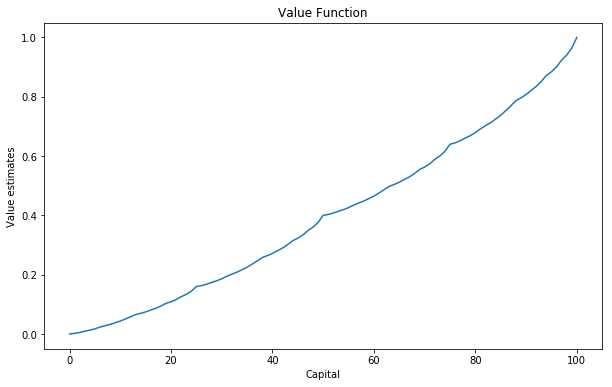

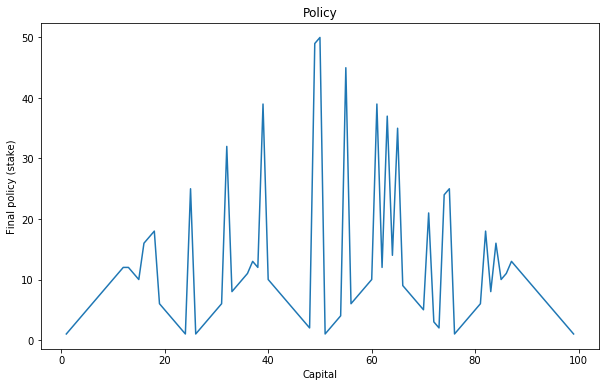

In [68]:
V, pi = value_interation(p_h=0.4, theta=1e-20)

plot_results(V, pi)

### Run with $p_h = 0.25$

Value iteration converged after 29 iterations (delta = 0)


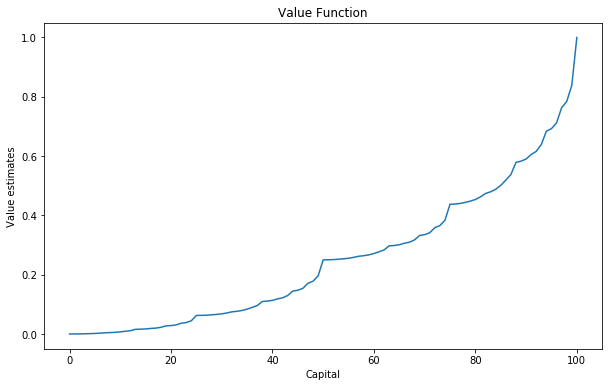

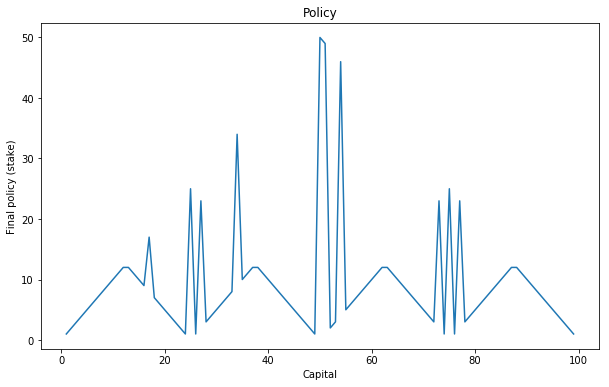

In [76]:
V, pi = value_interation(p_h=0.25, theta=1e-20)

plot_results(V, pi)

### Run with $p_h = 0.55$

Value iteration converged after 3028 iterations (delta = 0)


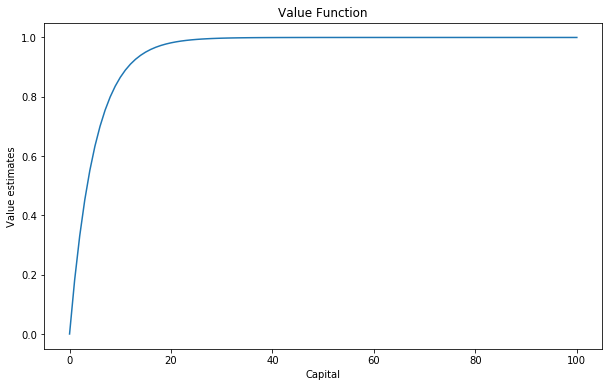

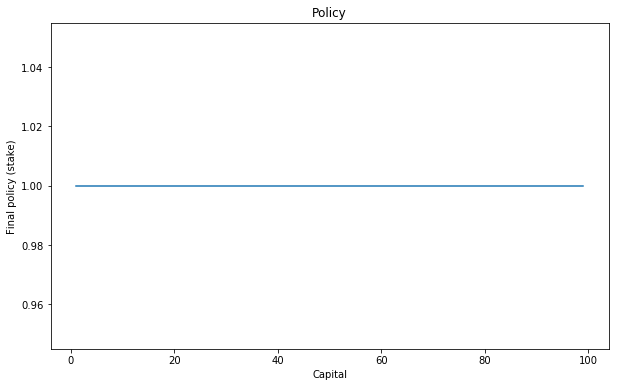

In [64]:
V, pi = value_interation(p_h=0.55, theta=1e-20)

plot_results(V, pi)